Scaling is necessary in order to prevent differing magnitude among variables from producing erros and also to prepare data for machine learning. 

Scaling Data:

Normalization - putting each observation on a relative scale from 0 to 1. Value of observation/sum of all observations in a variable

Standardization - Rescaling data so it has a zero mean and unit variance. 

scikit-learn preprocessing tools:
There are tools for scaling data, centering data, normalizing data, binning data, and imputing data. 


In [1]:
import numpy as np
import pandas as pd
import scipy


import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
cars = pd.read_csv("mtcars.csv")
cars.head()

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


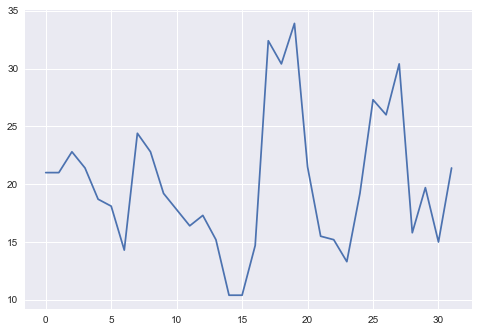

In [6]:
mpg = cars["mpg"]
plt.plot(mpg)
plt.show()

In [7]:
mpg.max()

33.899999999999999

In [15]:
mpg.min()


10.4

In [9]:
mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

In [19]:
mpg.count()

32

In [12]:
mpg_matrix = mpg.values.reshape(-1,1) #reshaping into a matrix of width 1 and hegith = length(mpg) = 32 = mpg.count()
print(mpg_matrix)
print(type(mpg_matrix))

[[ 21. ]
 [ 21. ]
 [ 22.8]
 [ 21.4]
 [ 18.7]
 [ 18.1]
 [ 14.3]
 [ 24.4]
 [ 22.8]
 [ 19.2]
 [ 17.8]
 [ 16.4]
 [ 17.3]
 [ 15.2]
 [ 10.4]
 [ 10.4]
 [ 14.7]
 [ 32.4]
 [ 30.4]
 [ 33.9]
 [ 21.5]
 [ 15.5]
 [ 15.2]
 [ 13.3]
 [ 19.2]
 [ 27.3]
 [ 26. ]
 [ 30.4]
 [ 15.8]
 [ 19.7]
 [ 15. ]
 [ 21.4]]
<type 'numpy.ndarray'>


In [21]:
scaled = preprocessing.MinMaxScaler()
scaled_mpg = scaled.fit_transform(mpg_matrix)
scaled_mpg

#this has now been scaled to between 0 and 1.

array([[ 0.45106383],
       [ 0.45106383],
       [ 0.52765957],
       [ 0.46808511],
       [ 0.35319149],
       [ 0.32765957],
       [ 0.16595745],
       [ 0.59574468],
       [ 0.52765957],
       [ 0.37446809],
       [ 0.31489362],
       [ 0.25531915],
       [ 0.29361702],
       [ 0.20425532],
       [ 0.        ],
       [ 0.        ],
       [ 0.18297872],
       [ 0.93617021],
       [ 0.85106383],
       [ 1.        ],
       [ 0.47234043],
       [ 0.21702128],
       [ 0.20425532],
       [ 0.12340426],
       [ 0.37446809],
       [ 0.71914894],
       [ 0.66382979],
       [ 0.85106383],
       [ 0.22978723],
       [ 0.39574468],
       [ 0.19574468],
       [ 0.46808511]])

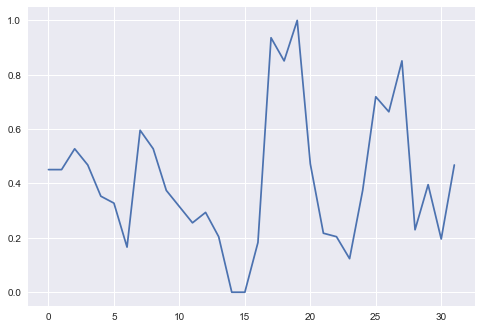

In [22]:
plt.plot(scaled_mpg)
plt.show()

In [25]:
scaled = preprocessing.MinMaxScaler(feature_range=(0,10))
scaled_mpg = scaled.fit_transform(mpg_matrix) #feature range for the values to be scaled to.
scaled_mpg

#this has now been scaled to between 0 and 1.

array([[  4.5106383 ],
       [  4.5106383 ],
       [  5.27659574],
       [  4.68085106],
       [  3.53191489],
       [  3.27659574],
       [  1.65957447],
       [  5.95744681],
       [  5.27659574],
       [  3.74468085],
       [  3.14893617],
       [  2.55319149],
       [  2.93617021],
       [  2.04255319],
       [  0.        ],
       [  0.        ],
       [  1.82978723],
       [  9.36170213],
       [  8.5106383 ],
       [ 10.        ],
       [  4.72340426],
       [  2.17021277],
       [  2.04255319],
       [  1.23404255],
       [  3.74468085],
       [  7.19148936],
       [  6.63829787],
       [  8.5106383 ],
       [  2.29787234],
       [  3.95744681],
       [  1.95744681],
       [  4.68085106]])

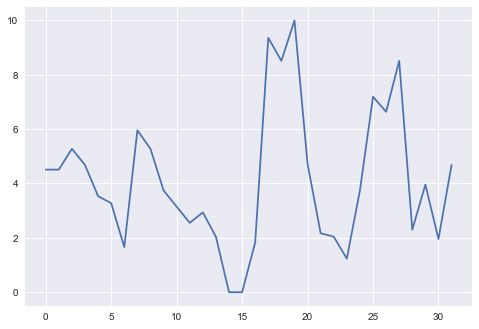

In [26]:
plt.plot(scaled_mpg)
plt.show()

In [27]:
standardized_mpg = scale(mpg,axis=0,with_mean=False,with_std=False) #standardization 
standardized_mpg

array([ 21. ,  21. ,  22.8,  21.4,  18.7,  18.1,  14.3,  24.4,  22.8,
        19.2,  17.8,  16.4,  17.3,  15.2,  10.4,  10.4,  14.7,  32.4,
        30.4,  33.9,  21.5,  15.5,  15.2,  13.3,  19.2,  27.3,  26. ,
        30.4,  15.8,  19.7,  15. ,  21.4])

In [28]:
#when you do standardization without passing in with_mean and with_std, it will do standardization
# it will center mean to 0 and variance to 1.
standardized_mpg = scale(mpg,axis=0) #standardization 
standardized_mpg


array([ 0.15329914,  0.15329914,  0.4567366 ,  0.22072968, -0.23442651,
       -0.33557233, -0.97616253,  0.72645879,  0.4567366 , -0.15013833,
       -0.38614524, -0.62215216, -0.47043343, -0.8244438 , -1.63361037,
       -1.63361037, -0.90873199,  2.07506974,  1.737917  ,  2.32793429,
        0.23758732, -0.77387089, -0.8244438 , -1.1447389 , -0.15013833,
        1.21533026,  0.99618098,  1.737917  , -0.72329798, -0.06585014,
       -0.85815908,  0.22072968])

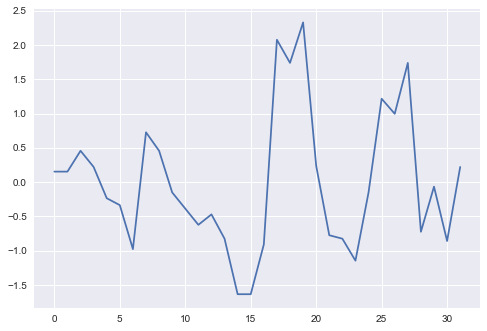

In [29]:
plt.plot(standardized_mpg)
plt.show()